<h1 style="text-align:center;;">WEB SCRAPPING</h1>
<p style="text-align:center;"> SCRAPPING SCRIPT FOR WEEKLY WEATHR FORECAST OF 10 MAJOR CITIES OF PAKISTAN</P>

<h1 style="text-align:center;;">IMPORTING REQUIRED PACKAGES</h1>

In [2]:
import bs4 as bs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from requests.exceptions import RequestException
from contextlib import closing
from requests import get

<h1 style="text-align:center;;">FUNCTIONS FOR SCRAPPING HTML</h1>

In [3]:
def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)

<p style="text-align:center;"> CONVERTING PLAIN HTML INTO SOUP OBJECT</P>

In [7]:
source = simple_get("https://eldoradoweather.com/forecast/pakistan/Karachi.php")
soup = bs.BeautifulSoup(source, "html.parser")
print(soup.head())

[<title>Karachi, Pakistan 7 Day Weather Forecast with Current Weather Conditions for Karachi, PK." /&gt;
</title>, <meta content="5 Day, 7 Day, 7 Day Weather Forecast and Current Weather Observations for Karachi, Pakistan with Current Weather Conditions Including Temperature, Pressure, Wind, and Precipitation, Rainfall, Snowfall Forecast for Karachi, PK." name="description"/>, <meta content="Karachi Pakistan 7 Day weather forecast, Karachi 7 day weather forecast, Karachi 5 day weather forecast, forecast in celsius and in fahrenheit, current conditions in celsius and in fahrenheit, Karachi Pakistan live weather conditions, Karachi current live temperatures, Karachi current live barometric pressure, Karachi current live dewpoint, Karachi current live humidity, Karachi current live rainfall totals, Karachi current live precipitation totals, Karachi current live wind speed, Karachi current live wind chill, Karachi current live heat index, Karachi current live visibility, Karachi current li

<p style="text-align:center;"> DATE AND TIME </P>

In [187]:
date_time = soup.find("span", style = "font-family:ubuntu; font-size:15px; float:left").get_text().strip()[14:32]
print(date_time)

'June 25, 00:30 AM'

<p style="text-align:center;"> SHORT WEATHER DESCRIPTION</P>

In [188]:
short_descriptions = soup.find_all("span", style = "font-family:arial;")
short_weather_description = list(desc.get_text().strip().title() for desc in short_descriptions)
print(short_weather_description)

['Sunny',
 'Sunny',
 'Partly Cloudy',
 'Partly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Partly Cloudy']

<p style="text-align:center;"> WEEKLY FORECAST OF MAXIMUM TEMPERATURE EXPECTED IN DEGREES AND FAHRENHEIT</P>

In [189]:
max_temperatures = soup.find_all("span", style = "color:#990000;")

max_temperatures_in_centi = list(temp.get_text().strip() for temp in max_temperatures[0:len(max_temperatures):2])
print(max_temperatures_in_centi)

max_temperatures_in_fahren = list(temp.get_text().strip() for temp in max_temperatures[1:len(max_temperatures)+1:2])
print(max_temperatures_in_fahren) 

['35', '34', '32', '33', '33', '34', '33']
['95', '93', '90', '91', '91', '92', '92']


<p style="text-align:center;"> NAME OF THE REPORTNG DAYS</P>

In [224]:
days_of_report = soup.find_all("div", style = "margin-bottom:6px; margin-top:3px; font-size:13px; font-family:ubuntu;")
days_of_report = [day.get_text().strip().upper() for day in days_of_report]
print(days_of_report)

['TODAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY', 'MONDAY']


<h1 style="text-align:center;;">WORKING ON 10 CITIES</h1>

In [192]:
cities_to_report = {"karachi":"https://eldoradoweather.com/forecast/pakistan/Karachi.php",
                   "hyderabad":"https://eldoradoweather.com/forecast/pakistan/Hyderabad.php",
                   "lahore":"https://eldoradoweather.com/forecast/pakistan/Lahore.php",
                   "rawalpindi":"https://eldoradoweather.com/forecast/pakistan/Rawalpindi.php",
                   "faisalabad":"https://eldoradoweather.com/forecast/pakistan/Faisalabad.php",
                   "sialkot":"https://eldoradoweather.com/forecast/pakistan/Sialkot.php",
                   "gilgit":"https://eldoradoweather.com/forecast/pakistan/Gilgit.php",
                   "quetta":"https://eldoradoweather.com/forecast/pakistan/Quetta.php",
                   "sukkur":"https://eldoradoweather.com/forecast/pakistan/Sukkur.php",
                   "islamabad":"https://eldoradoweather.com/forecast/pakistan/Islamabad.php",}

In [196]:
dict_of_soup = {}
for city in cities_to_report:
    source = simple_get(cities_to_report[city])
    soup = bs.BeautifulSoup(source, "html.parser")
    dict_of_soup[city] = soup

In [206]:
final_data = pd.DataFrame()
for city in dict_of_soup:
    
    #time and date at the moment of scrapping
    date_time = dict_of_soup[city].find("span", style = "font-family:ubuntu; font-size:15px; float:left").get_text().strip()[14:32]
    
    #short description of weather
    short_descriptions = dict_of_soup[city].find_all("span", style = "font-family:arial;")
    short_weather_description = list(desc.get_text().strip().title() for desc in short_descriptions)
    
    #maximum temperature value
    max_temperatures = dict_of_soup[city].find_all("span", style = "color:#990000;")

    max_temperatures_in_centi = list(temp.get_text().strip() for temp in max_temperatures[0:len(max_temperatures):2])
    max_temperatures_in_fahren = list(temp.get_text().strip() for temp in max_temperatures[1:len(max_temperatures)+1:2])
    
   
    #days of reporting
    days_of_report = dict_of_soup[city].find_all("div", style = "margin-bottom:6px; margin-top:3px; font-size:13px; font-family:ubuntu;")
    days_of_report = [day.get_text().strip().upper() for day in days_of_report]
    
    #Appending data into dataframe.
    weather_report = pd.DataFrame({"Date_Time":date_time, 
                                   "Description":short_weather_description, 
                                   "Max Temp C": max_temperatures_in_centi,
                                  "Max Temp F": max_temperatures_in_fahren,
                                  "Days": days_of_report,
                                  "City": city})
    final_data = final_data.append(weather_report, ignore_index = True)

<h1 style="text-align:center;;">DATA PREPARATION AND ANALYSIS</h1>

In [207]:
final_data.head()

,Date_Time,Description,Max Temp C,Max Temp F,Days,City
0,"June 25, 00:30 AM",Sunny,35,95,TODAY,karachi
1,"June 25, 00:30 AM",Sunny,34,93,WEDNESDAY,karachi
2,"June 25, 00:30 AM",Partly Cloudy,32,90,THURSDAY,karachi
3,"June 25, 00:30 AM",Partly Cloudy,33,91,FRIDAY,karachi
4,"June 25, 00:30 AM",Mostly Cloudy,33,91,SATURDAY,karachi


In [208]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
Date_Time      70 non-null object
Description    70 non-null object
Max Temp C     70 non-null object
Max Temp F     70 non-null object
Days           70 non-null object
City           70 non-null object
dtypes: object(6)
memory usage: 3.4+ KB


In [209]:
final_data.shape

(70, 6)

In [210]:
final_data.dtypes

Date_Time      object
Description    object
Max Temp C     object
Max Temp F     object
Days           object
City           object
dtype: object

In [211]:
final_data.isna()
final_data = final_data.replace(r'^\s*$', np.nan, regex=True)
final_data.isna()

,Date_Time,Description,Max Temp C,Max Temp F,Days,City
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [212]:
final_data = final_data.dropna(axis = 0, how ='any' )
final_data = final_data.reset_index(drop=True)
final_data

,Date_Time,Description,Max Temp C,Max Temp F,Days,City
0,"June 25, 00:30 AM",Sunny,35,95,TODAY,karachi
1,"June 25, 00:30 AM",Sunny,34,93,WEDNESDAY,karachi
2,"June 25, 00:30 AM",Partly Cloudy,32,90,THURSDAY,karachi
3,"June 25, 00:30 AM",Partly Cloudy,33,91,FRIDAY,karachi
4,"June 25, 00:30 AM",Mostly Cloudy,33,91,SATURDAY,karachi
5,"June 25, 00:30 AM",Mostly Cloudy,34,92,SUNDAY,karachi
6,"June 25, 00:30 AM",Partly Cloudy,33,92,MONDAY,karachi
7,"June 25, 00:30 AM",Sunny,42,108,TODAY,hyderabad
8,"June 25, 00:30 AM",Sunny,42,108,WEDNESDAY,hyderabad
9,"June 25, 00:30 AM",Sunny,38,100,THURSDAY,hyderabad


In [213]:
final_data["Max Temp C"] = pd.to_numeric(final_data["Max Temp C"]).astype(int)
final_data["Max Temp F"] = pd.to_numeric(final_data["Max Temp F"]).astype(int)
final_data.dtypes

Date_Time      object
Description    object
Max Temp C      int32
Max Temp F      int32
Days           object
City           object
dtype: object

In [214]:
final_data["Max Temp C"].describe()

count    70.000000
mean     38.971429
std       8.578658
min      15.000000
25%      34.000000
50%      41.500000
75%      45.750000
max      48.000000
Name: Max Temp C, dtype: float64

C:\Users\3tee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


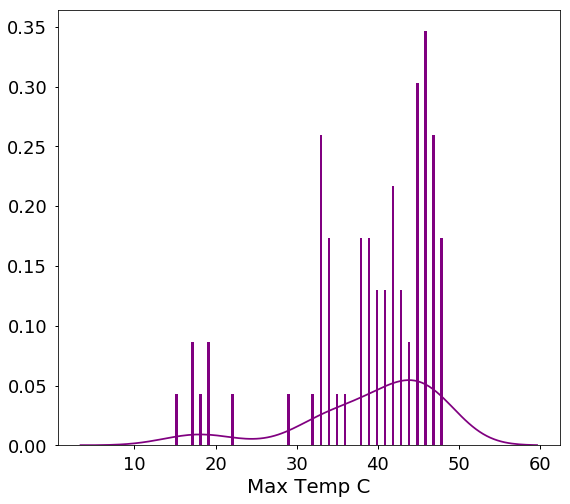

In [215]:
plt.figure(figsize=(9, 8))
sns.distplot(final_data['Max Temp C'], color='purple', bins=100, hist_kws={'alpha': 1});

C:\Users\3tee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


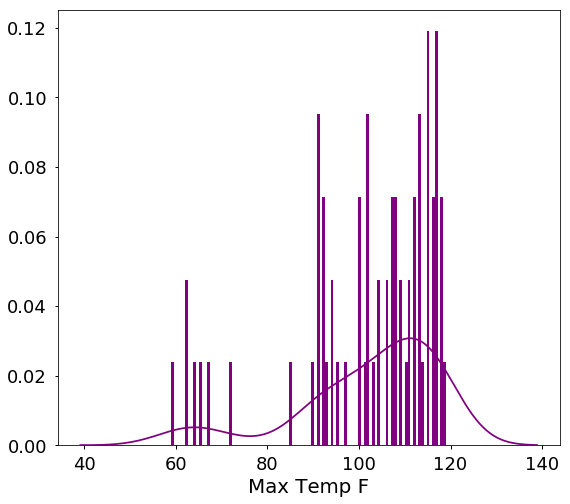

In [217]:
plt.figure(figsize=(9, 8))
sns.distplot(final_data['Max Temp F'], color='purple', bins=100, hist_kws={'alpha': 1});

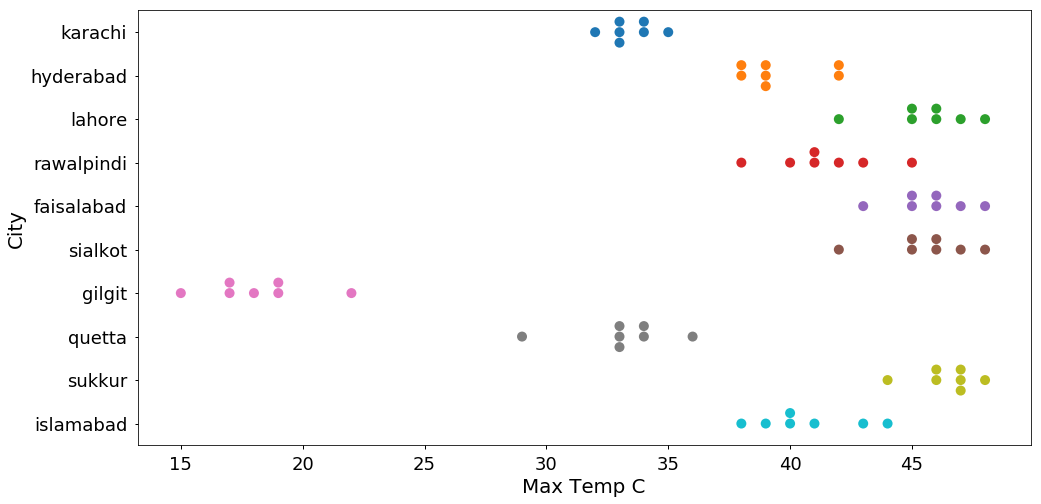

In [218]:
plt.figure(figsize=(16, 8))
sns.set_context("notebook", font_scale=1.8)
sns.swarmplot(x=final_data["Max Temp C"], y=final_data["City"], data=final_data, size = 10)

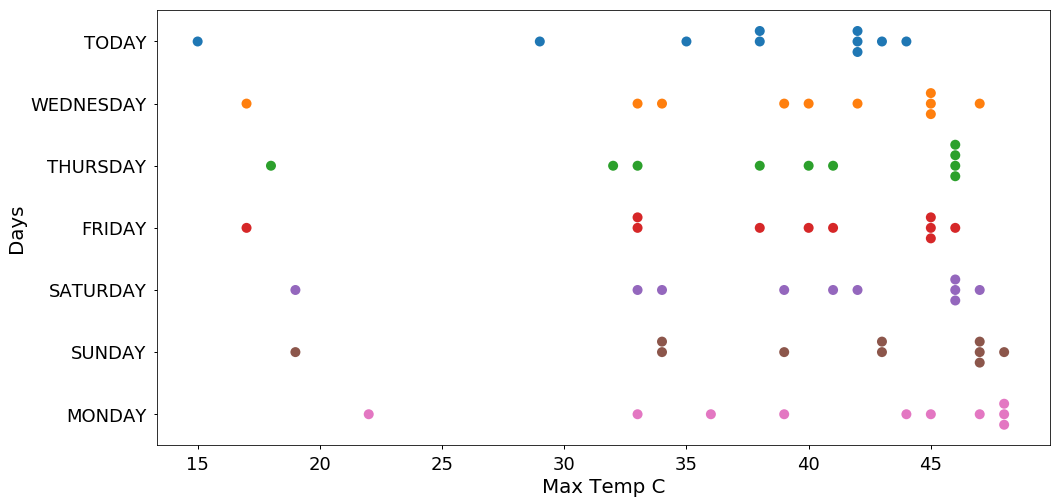

In [219]:
plt.figure(figsize=(16, 8))
sns.set_context("notebook", font_scale=1.8)
sns.swarmplot(x=final_data["Max Temp C"], y=final_data["Days"], data=final_data, size = 10)

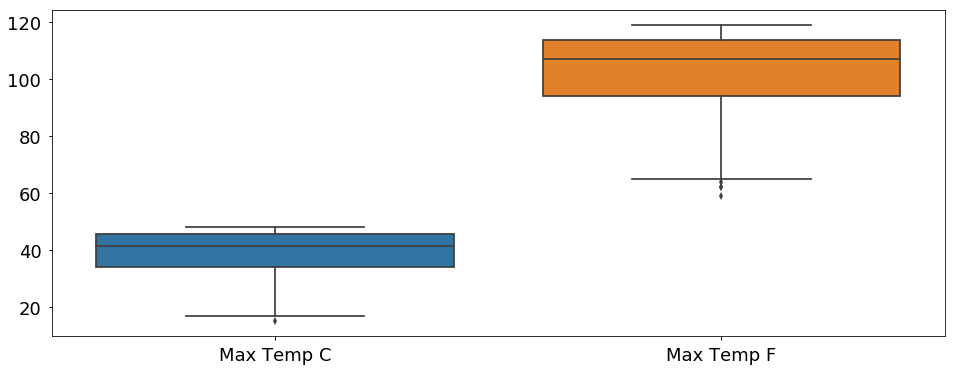

In [220]:
plt.figure(figsize=(16, 6))
sns.set_context("notebook", font_scale=1.8)
sns.boxplot(data=final_data)

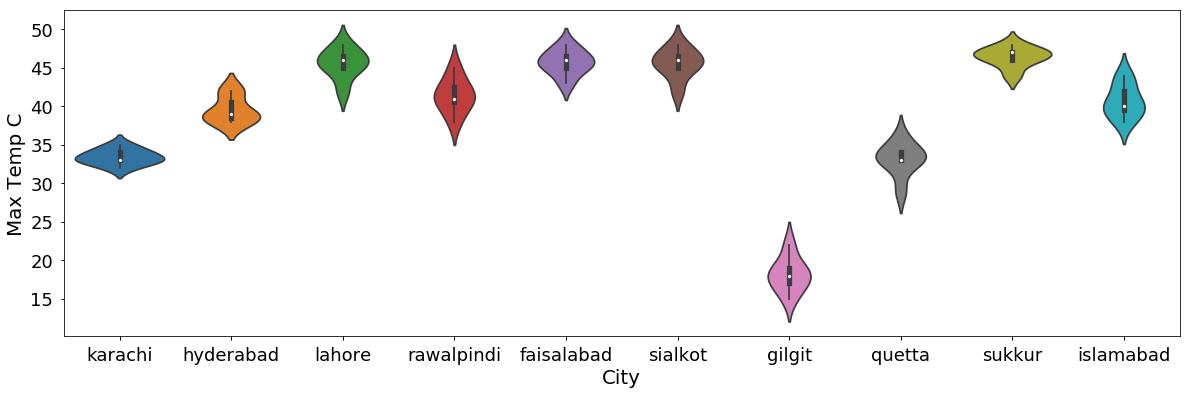

In [221]:
plt.figure(figsize=(20, 6))
sns.set_context("notebook", font_scale=1.8)
sns.violinplot(y=final_data["Max Temp C"], x=final_data["City"], data=final_data)

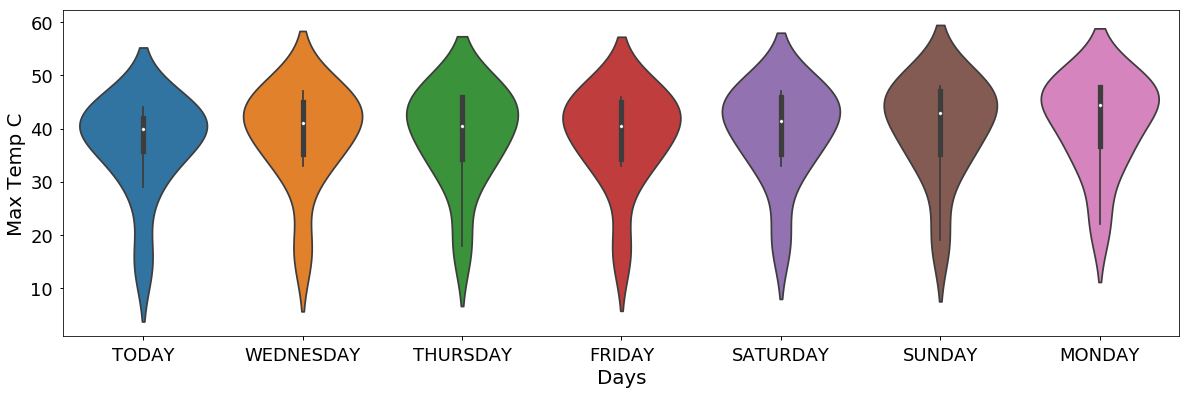

In [222]:
plt.figure(figsize=(20, 6))
sns.set_context("notebook", font_scale=1.8)
sns.violinplot(y=final_data["Max Temp C"], x=final_data["Days"], data=final_data)